In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
data = pd.read_csv('Android_Malware.csv')
data.head()

C:\Users\hp\AppData\Local\Temp\ipykernel_11776\4014566368.py:8: DtypeWarning: Columns (56,58,63) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Android_Malware.csv')


,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.6.202-10.42.0.211-443-50004-6,10.42.0.211,50004,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,37027,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
1,1,172.217.6.202-10.42.0.211-443-35455-6,10.42.0.211,35455,172.217.6.202,443.0,6.0,13/06/2017 11:52:39,36653,1,...,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
2,2,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,534099,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
3,3,131.253.61.68-10.42.0.211-443-51775-6,10.42.0.211,51775,131.253.61.68,443.0,6.0,13/06/2017 11:52:43,9309,3,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware
4,4,131.253.61.68-10.42.0.211-443-51776-6,10.42.0.211,51776,131.253.61.68,443.0,6.0,13/06/2017 11:52:42,19890496,8,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Android_Adware


In [9]:
data = data.drop(' Timestamp', axis = 1)
print(data.columns)

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Flow Duration',
       ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Length', ' Max Pa

Unnamed: 0           int64
Flow ID             object
 Source IP          object
 Source Port         int64
 Destination IP     object
                    ...   
Idle Mean          float64
 Idle Std          float64
 Idle Max          float64
 Idle Min          float64
Label               object
Length: 85, dtype: object

In [35]:
def Q1_spread(feat_vecs_class1, feat_vecs_class2):
    #Finding the spread of each classes.
    spread_class1 = np.std(feat_vecs_class1, axis=0)
    spread_class2 = np.std(feat_vecs_class2, axis=0)
    print("printing spread1")
    print(spread_class1)
    print("printing spread2")
    print(spread_class2)

def Q1_distance(centroid_class1, centroid_class2):
    #Finding the distance between mean vectors between the classes
    distance_between_centroids = np.linalg.norm(centroid_class1 - centroid_class2)
    print("printing the interclass distance: ")
    print(distance_between_centroids)

In [36]:
def Q1_mean(data):
    X = data.drop(columns='Label')
    X = X.dropna()
    y = data['Label']
    #Filter the features vectors for each class
    feat_vecs_class1 = X[y == 'Android_Adware'].to_numpy() #convert to numpy array
    feat_vecs_class2 = X[y == 'Android_Scareware'].to_numpy() #convert to numpy array

    #Finding the centroid of first class Android_Adware
    centroid_class1 = np.mean(feat_vecs_class1, axis=0)
    #Finding the centroid of second class Android_Scareware
    centroid_class2 = np.mean(feat_vecs_class2, axis=0)
    print("printing centroid2")
    print(centroid_class2)
    print("printing centroid1")
    print(centroid_class1)

    Q1_spread(feat_vecs_class1,feat_vecs_class2)
    Q1_distance(centroid_class1, centroid_class2)


numeric_data= data.select_dtypes(include=[np.number])
numeric_data['Label'] = data['Label']
Q1_mean(numeric_data)

C:\Users\hp\AppData\Local\Temp\ipykernel_11776\3352051703.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feat_vecs_class1 = X[y == 'Android_Adware'].to_numpy() #convert to numpy array
C:\Users\hp\AppData\Local\Temp\ipykernel_11776\3352051703.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  feat_vecs_class2 = X[y == 'Android_Scareware'].to_numpy() #convert to numpy array


printing centroid2
[ 1.86474967e+03  3.93786877e+04  5.13889390e+03  8.28775805e+00
  1.14476257e+07  7.83753982e+00  1.10046634e+01  8.15931244e+02
  1.16620642e+04  2.18787130e+02  1.25404207e+01  6.04650720e+01
  8.06267008e+01  3.37825394e+02  2.43642436e+01  1.78202607e+02
  1.29641366e+02  7.23734771e+04  5.10946436e+03  3.10836456e+06
  2.58642013e+06  9.79836417e+06  1.91614520e+06  7.82314680e+06
  3.15094029e+06  2.06719207e+06  6.38754978e+06  1.94307460e+06
  6.22845995e+06  1.01913152e+06  1.50686617e+06  5.11778237e+06
  3.83262877e+05  6.67657434e-02  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -6.60140553e+05 -1.87171499e+06  4.29208758e+03
  8.17376785e+02  8.11654325e+00  3.91854818e+02  1.19845236e+02
  1.51780636e+02  7.55140740e+04  1.86622936e-02  6.67657434e-02
  0.00000000e+00  3.33623731e-01  4.31496144e-01  1.96453737e-01
  0.00000000e+00  1.32182969e+02  6.04650720e+01  1.78202607e+02
 -6.60140553e+05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00

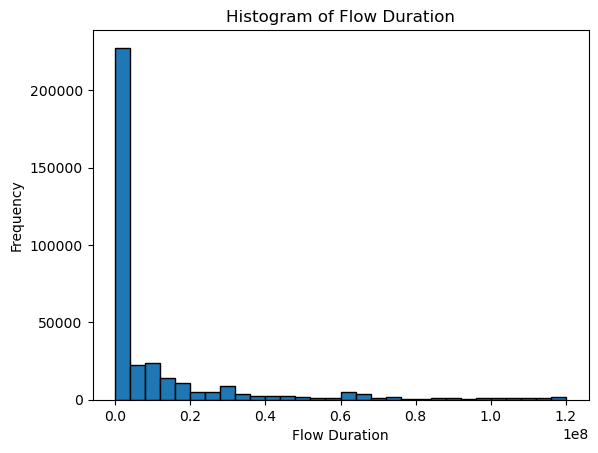

Mean of Flow Duration: 10929747.110913027
Variance of Flow Duration: 475614172714218.94


In [39]:
def Q2(data):
    feature = data[' Flow Duration']
    
    #Plotting the histogram

    plt.hist(feature, bins=30, edgecolor='black')
    plt.title('Histogram of Flow Duration')
    plt.xlabel('Flow Duration')
    plt.ylabel('Frequency')
    plt.show()
    
    #calculating the mean and variance of feature Flow Duration
    
    mean = np.mean(feature)
    variance = np.var(feature)  
    print(f"Mean of Flow Duration: {mean}")
    print(f"Variance of Flow Duration: {variance}")
    
Q2(numeric_data)

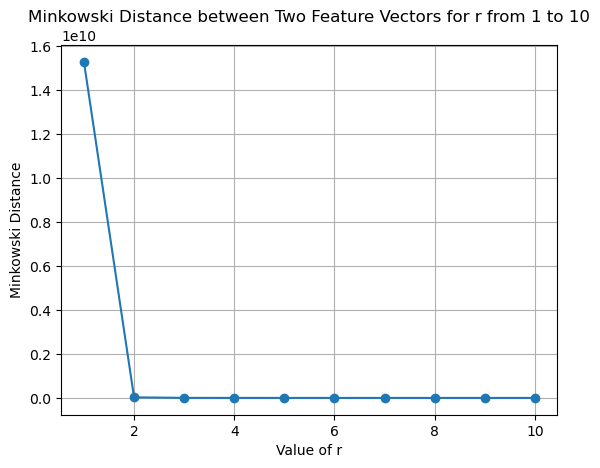

Minkowski distances for r from 1 to 10:  [15282159143.652721, 26784751.829388786, 3275573.359974605, 1155183.8806954322, 622871.5372618494, 418573.85951607075, 327842.3334293531, 293685.9489509322, 284977.91658668395, 283272.263058509]


In [41]:
def Q3(data):
    
    #Taking any two features vectors
    
    feature_vector1 = data[' Source Port'].to_numpy()
    feature_vector2 = data[' Destination Port'].to_numpy()

    #Initializing an empty list to store the distances

    minkowski_distances = []

    #calculating Minkowski distance for r from 1 to 10

    for r in range(1,11):
        dist = distance.minkowski(feature_vector1, feature_vector2, r)
        minkowski_distances.append(dist)

    #plotting the distances
    
    plt.plot(range(1, 11), minkowski_distances, marker='o')
    plt.title('Minkowski Distance between Two Feature Vectors for r from 1 to 10')
    plt.xlabel('Value of r')
    plt.ylabel('Minkowski Distance')
    plt.grid(True)
    plt.show()

    #Printing the distances

    print("Minkowski distances for r from 1 to 10: ", minkowski_distances)

Q3(numeric_data)

In [53]:
#QN 4

# Dropping the unnecessary columns from the dataset
        
X = data.drop(columns=['Label', 'Flow ID', ' Source IP', ' Destination IP', ' Timestamp'])
y = data['Label']  #Target Column

#Converting all features columns to numeric, invalid parsing will be set as NaN

X = X.apply(pd.to_numeric, errors='coerce')

#Handling the missing values by filling NaNs with 0

X = X.fillna(0)

#Converting target variable into numeric labels

y = y.astype('category').cat.codes  #Converting labels to categorical codes

#Splitting the dataset into train and test sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
#Q5

#Initializing the KNN classifier with k = 3
    
knn = KNeighborsClassifier(n_neighbors=3)
    
# Train the model using the training set
    
knn.fit(X_train, y_train)

#Q6

#Making prediction on the test set

y_pred = knn.predict(X_test)
y_train_pred = knn.predict(X_train)

#Evaluating the accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 48.30%


In [63]:
#Q7

test_vect = X_test.iloc[0].values.reshape(1,-1) #Reshape to make it 2D since predict() expects a 2D array

predicted_class = knn.predict(test_vect)
print(f"Predicted class for the test vector: {predicted_class[0]}")

#Printing the true class for comparison

true_class = y_test.iloc[0]
print(f"True class for the test vector: {true_class}")


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Predicted class for the test vector: 1
True class for the test vector: 0


Accuracy for k=1: 48.67%
Accuracy for k=2: 48.54%
Accuracy for k=3: 48.30%
Accuracy for k=4: 48.04%
Accuracy for k=5: 47.82%
Accuracy for k=6: 47.87%
Accuracy for k=7: 47.60%
Accuracy for k=8: 47.39%
Accuracy for k=9: 47.64%
Accuracy for k=10: 47.60%
Accuracy for k=11: 47.50%


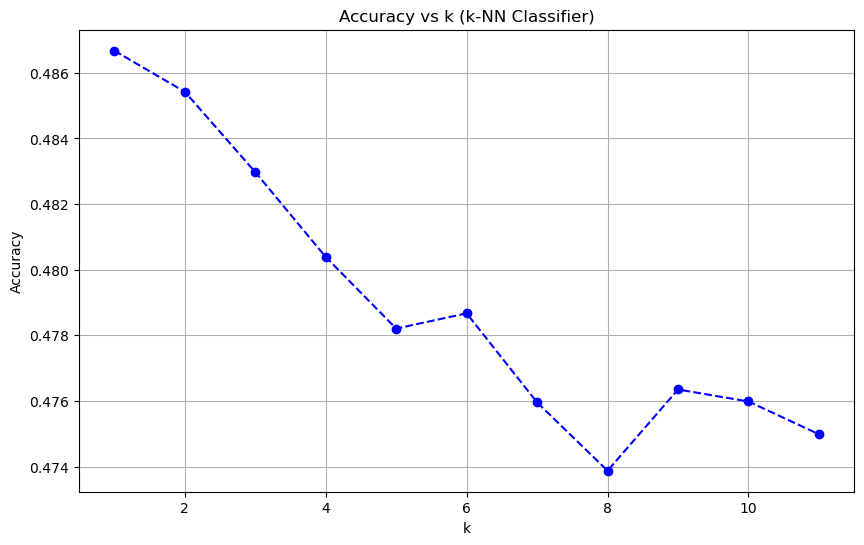

In [64]:
#Q8
def Q8(X_train, y_train, X_test, y_test):
    accuracies = []
    
    #varying k form 1 to 11
    
    for k in range(1,12):
        knn = KNeighborsClassifier(n_neighbors=k)
    
        #Training the classifier
    
        knn.fit(X_train, y_train)
    
        y_pred = knn.predict(X_test)
    
        accuracy = accuracy_score(y_test, y_pred)
    
        #Appending each accuracy to accuracies list
        
        accuracies.append(accuracy)
    
        print(f"Accuracy for k={k}: {accuracy * 100:.2f}%")
    
    #ploting the accuracy vs k
    
    plt.figure(figsize=(10,6))
    plt.plot(range(1, 12), accuracies, marker='o', color='b', linestyle='--')
    plt.title('Accuracy vs k (k-NN Classifier)')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

Q8(X_train,y_train,X_test,y_test)

In [71]:
def Q9(X_train, y_train, X_test, y_test, y_pred, y_train_pred):

    #For training data
    train_conf_matrix = confusion_matrix(y_train,y_train_pred)
    print("Training Confusion Matrix: ")
    print(train_conf_matrix)

    #For test data
    test_conf_matrix = confusion_matrix(y_test, y_pred)
    print("Test Confusion Matrix: ")
    print(train_conf_matrix)

    #classification Report

    train_report = classification_report(y_train, y_train_pred, target_names=['Benign','Scareware','Adware','Spyware'])
    print("Training Classification Report: ")
    print(train_report)

    #For test data

    test_report = classification_report(y_test, y_pred, target_names=['Benign','Scareware','Adware','Spyware'])
    print("Test Classification Report:")
    print(test_report)

Q9(X_train, y_train, X_test, y_test, y_pred, y_train_pred)

Training Confusion Matrix: 
[[102299   3532  11338    761]
 [ 16525  30614   6400    426]
 [ 24907   7503  60726    542]
 [  7151   2743   1763   7274]]
Test Confusion Matrix: 
[[102299   3532  11338    761]
 [ 16525  30614   6400    426]
 [ 24907   7503  60726    542]
 [  7151   2743   1763   7274]]
Training Classification Report: 
              precision    recall  f1-score   support

      Benign       0.68      0.87      0.76    117930
   Scareware       0.69      0.57      0.62     53965
      Adware       0.76      0.65      0.70     93678
     Spyware       0.81      0.38      0.52     18931

    accuracy                           0.71    284504
   macro avg       0.73      0.62      0.65    284504
weighted avg       0.71      0.71      0.70    284504

Test Classification Report:
              precision    recall  f1-score   support

      Benign       0.53      0.68      0.60     29513
   Scareware       0.38      0.31      0.34     13432
      Adware       0.45      0.39      